In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
songs_data = pd.DataFrame({
    'happy': [0.8, 0.7, 0.1, 0.2, 0.3, 0.5, 0.9],
    'sad': [0.1, 0.3, 0.6, 0.9, 0.8, 0.6, 0.1],
    'danceability': [0.9, 0.5, 0.3, 0.2, 0.2, 0.4, 0.9],
    'liveliness': [0.8, 0.3, 0.2, 0.5, 0.1, 0.3, 0.9],
})

songs_data

,happy,sad,danceability,liveliness
0,0.8,0.1,0.9,0.8
1,0.7,0.3,0.5,0.3
2,0.1,0.6,0.3,0.2
3,0.2,0.9,0.2,0.5
4,0.3,0.8,0.2,0.1
5,0.5,0.6,0.4,0.3
6,0.9,0.1,0.9,0.9


In [3]:
input_tags = songs_data[['happy', 'sad']]
input_tags

,happy,sad
0,0.8,0.1
1,0.7,0.3
2,0.1,0.6
3,0.2,0.9
4,0.3,0.8
5,0.5,0.6
6,0.9,0.1


In [4]:
output_tags = songs_data[['danceability', 'liveliness']]
output_tags

,danceability,liveliness
0,0.9,0.8
1,0.5,0.3
2,0.3,0.2
3,0.2,0.5
4,0.2,0.1
5,0.4,0.3
6,0.9,0.9


In [5]:
n = len(input_tags)
m = len(input_tags.columns)
p = len(output_tags.columns)

x = input_tags.to_numpy()
y = output_tags.to_numpy()

print(x)
print(y)

[[0.8 0.1]
 [0.7 0.3]
 [0.1 0.6]
 [0.2 0.9]
 [0.3 0.8]
 [0.5 0.6]
 [0.9 0.1]]
[[0.9 0.8]
 [0.5 0.3]
 [0.3 0.2]
 [0.2 0.5]
 [0.2 0.1]
 [0.4 0.3]
 [0.9 0.9]]


In [6]:
init_range = 0.1
w = np.random.uniform(low=-init_range, high=init_range, size=(m, p))
b = np.random.uniform(low=-init_range, high=init_range, size=(n, p))
eta = 0.05

In [7]:
for i in range(1000):
    y_hat = np.matmul(x, w) + b
    deltas = y_hat - y
    loss = np.sum(deltas ** 2) / (2 * n)
    deltas_scaled = deltas / n

    w = w - eta * np.matmul(x.T, deltas_scaled)
    b = b - eta * deltas_scaled

print(w)
print(b)
print(deltas)

[[0.60034154 0.53265746]
 [0.0611065  0.14213969]]
[[ 0.41348039  0.35953222]
 [ 0.06150277 -0.11525865]
 [ 0.20315482  0.06134742]
 [ 0.02489434  0.26538883]
 [-0.02889606 -0.17338642]
 [ 0.06323525 -0.05152213]
 [ 0.35360128  0.40627309]]
[[-1.36703933e-04 -1.28762918e-04]
 [ 7.43291511e-05  2.45225225e-04]
 [-1.48180352e-04 -1.03755388e-04]
 [-4.17973459e-05 -1.55064535e-04]
 [ 9.22598649e-05  1.23448730e-04]
 [ 7.04252467e-05  9.10641629e-05]
 [ 1.94564636e-05 -1.22101587e-04]]


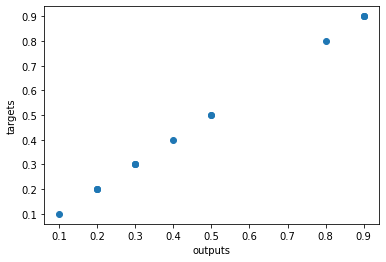

In [8]:
plt.scatter(y_hat, y)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [9]:
songs_data['danceability (predicted)'] = y_hat[:, 0]
songs_data['liveliness (predicted)'] = y_hat[:, 1]

songs_data

,happy,sad,danceability,liveliness,danceability (predicted),liveliness (predicted)
0,0.8,0.1,0.9,0.8,0.899863,0.799871
1,0.7,0.3,0.5,0.3,0.500074,0.300245
2,0.1,0.6,0.3,0.2,0.299852,0.199896
3,0.2,0.9,0.2,0.5,0.199958,0.499845
4,0.3,0.8,0.2,0.1,0.200092,0.100123
5,0.5,0.6,0.4,0.3,0.400070,0.300091
6,0.9,0.1,0.9,0.9,0.900019,0.899878
